<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to `statsmodels`
---

## Learning Objectives
### Core
- Understand what the statsmodels module is used for
- Learn how to build a linear/logistic regression model using statsmodels 
- Understand the practical differences between scikit-learn and statsmodels
- Interpret the output of models from statsmodels

### Target
- Know how to create formulas using the patsy module to easily specify target and predictor matrices
- Use the statsmodels formula api

## Introduction

Statsmodels is another much used package for statistical modeling and machine learning. However, whereas scikit-learn focuses more on predictions, for statsmodels the main focus is on the statistics and inference side. It contains a lower variety of models, but instead is able to run a number of frequentist statistical hypothesis tests and to determine confidence intervals to get insight about the validity of a model.

[The statsmodels documentation can be found here.](http://www.statsmodels.org/stable/index.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

## Load data for regression

In [3]:
data = datasets.load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [5]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.score(X, y))
print(lr.intercept_)
print(lr.coef_)

# this is how we did this in sklearn, whereas... 

0.7406426641094095
36.459488385089855
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


## Fitting a linear regression using `statsmodels`

---

Now we will fit the linear regression model using `statsmodels`.

First we load the statsmodels api module, which contains the ordinary least squares `OLS` model class. The statsmodels process is slightly different:
- We manually make a new column for the intercept in our design matrix $X$.
- The $y$ target variable comes before the $X$ predictor
- The data is provided during the instantiation of the model object, then fit is called without the data.

In [6]:
import statsmodels.api as sm

In [7]:
# adding the intercept manually
sm.add_constant(X).head()

/Users/Noah/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
model = sm.OLS(y, sm.add_constant(X)) # statsmodel version of sklearn's LinearRegression
results = model.fit()
predictions = results.predict(sm.add_constant(X))
print("R2-score:", results.rsquared)
print("RMSE:", np.sqrt(mean_squared_error(y, predictions)))

R2-score: 0.7406426641094095
RMSE: 4.679191295697281


### Statsmodels model coefficients

The model coefficients (coefficients and intercept) can be extract from the fitted model with `.params`.

In [8]:
results.params

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

Check that results for intercept and coefficients agree in both cases:

In [9]:
np.isclose(lr.intercept_, results.params.const)

True

In [10]:
np.allclose(lr.coef_, results.params[1:])

True

### Statsmodels `.summary()`  function

Once a model is fit with statsmodels, you can print out a variety of summary statistics, metrics, and properties of the model using the `model.summary()` function.

You are already familiar with some of the information available in the summary:
- R-squared
- Number of observations
- Coefficients for the variables and the intercept (const)
- Standard errors of the coefficients, t-statistics, p-values, and confidence intervals

There is also a variety of different metrics that we have not yet talked about. Don't hesitate to look up any of the statistics online if you are curious.

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 02 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        16:41:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## A brief introduction to `patsy` formulas

---

Why slice and dice the data yourself when you just write a formula that defines your model?

The `patsy` package allows you to specify the construction of your model using a formula string, and then returns the matrices required to fit the model.

Let's say we wanted to predict `CRIM` from `TAX`, `AGE` and `ZN`. We would write a string formula like

```
formula = 'CRIM ~ TAX + AGE + ZN'
```

Then, after importing patsy, we can generate our target and predictor matrix by supplying the formula and the dataframe that contains the corresponding columns.

```python
import patsy

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
```

In [12]:
df = X.copy()
df['MEDV'] = y

In [13]:
import patsy

formula = 'MEDV ~ TAX + AGE + ZN'

y, X_subset = patsy.dmatrices(formula, data=df, return_type='dataframe')

In [14]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [15]:
X_subset.head()

,Intercept,TAX,AGE,ZN
0,1.0,296.0,65.2,18.0
1,1.0,242.0,78.9,0.0
2,1.0,242.0,61.1,0.0
3,1.0,222.0,45.8,0.0
4,1.0,222.0,54.2,0.0


You'll notice that with `return_type='dataframe'` patsy's `.dmatrices()` function returns two pandas dataframes, one for the target and one for the design matrix. 

You'll also notice that it creates an intercept column by default. **If you do not want it to create an intercept column, add a -1 to the formula string**

In [16]:
formula = 'MEDV ~ TAX + AGE + ZN -1'

y, X_subset = patsy.dmatrices(formula, data=df, return_type='dataframe')

X_subset.head()

,TAX,AGE,ZN
0,296.0,65.2,18.0
1,242.0,78.9,0.0
2,242.0,61.1,0.0
3,222.0,45.8,0.0
4,222.0,54.2,0.0


We can use the matrices obtained from patsy in our model.

In [17]:
formula = 'MEDV ~ TAX + AGE + ZN'

y, X_subset = patsy.dmatrices(formula, data=df, return_type='dataframe')

In [18]:
model = sm.OLS(y, X_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     62.89
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           1.56e-34
Time:                        16:41:51   Log-Likelihood:                -1759.5
No. Observations:                 506   AIC:                             3527.
Df Residuals:                     502   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5071      1.322     23.828      0.000      28.909      34.105
TAX           -0.0200      0.002     -8.296      0.000      -0.025      -0.015
AGE           -0.0250      0.017     -1.503      0.134      -0.058       0.008
ZN             0.0795      0.018      4.351      0.000       0.044       0.115
==============================================================================
Omnibus:                      203.569   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              735.075
Skew:                           1.870   Prob(JB):                    2.40e-160
Kurtosis:                       7.568   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We could even construct more complicated formulas. For example it is possible to use numpy-functions inside the formula language.

In [19]:
formula = 'MEDV ~ (TAX + AGE + CRIM)**2 + np.power(AGE, 2)'

y, X_formula = patsy.dmatrices(formula, data=df, return_type='dataframe')
X_formula.head()

,Intercept,TAX,AGE,CRIM,TAX:AGE,TAX:CRIM,AGE:CRIM,"np.power(AGE, 2)"
0,1.0,296.0,65.2,0.00632,19299.2,1.87072,0.412064,4251.04
1,1.0,242.0,78.9,0.02731,19093.8,6.60902,2.154759,6225.21
2,1.0,242.0,61.1,0.02729,14786.2,6.60418,1.667419,3733.21
3,1.0,222.0,45.8,0.03237,10167.6,7.18614,1.482546,2097.64
4,1.0,222.0,54.2,0.06905,12032.4,15.32910,3.742510,2937.64


## Statsmodels formula api

Statsmodels has the option to use formula expressions straightforwardly.
To do so, one has to

- import a different submodule
- indicate a dataframe including the target variable
- use lower case for `ols`

In [17]:
import statsmodels.formula.api as smf

# this different sub-module and therefore the different (lowercase) ols we use below can handle the patsy
# formulas, clue is in the name of the submodule!

In [16]:
('+').join(X.columns)
# good thing about patsy you can join many many columns in an automated way, rather than manually

'CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [23]:
model = smf.ols(formula='MEDV ~ TAX + AGE + ZN', data=df)
results = model.fit()
predictions = results.predict(X)
print("R2-score: ", results.rsquared)
print("RMSE:", np.sqrt(mean_squared_error(y, predictions)))
results.summary()

# the P column below shows the importance of that variable to the model. Greater than 0 means it can be removed
# but then you'd have to remove and recalc the P-values.
# P here is null hypothesis test.. small means reject null hypothesis, large means accept that coefficient is 
# helpful to model. Note these are probability calcs, so within confidence you are making right choice, but not
# guaranteed, and particularly if you do this repeatedly, this chance of removing the wrong variable increases

# the last table below is about residuals, which need to be normally distributed for the CI for coefficients to
# be believable, we can see here they're not normally distributed

# Durbin-Watson tells if there's some pattern in the residuals. e.g. if residuals are smaller for more recent
# datapoints

R2-score:  0.2731750019949428
RMSE: 7.833150307174811


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     62.89
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           1.56e-34
Time:                        12:30:11   Log-Likelihood:                -1759.5
No. Observations:                 506   AIC:                             3527.
Df Residuals:                     502   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5071      1.322     23.828      0.000      28.909      34.105
TAX           -0.0200      0.002     -8.296      0.000      -0.025      -0.015
AGE           -0.0250      0.017     -1.503      0.134      -0.058       0.008
ZN             0.0795      0.018      4.351      0.000       0.044       0.115
==============================================================================
Omnibus:                      203.569   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              735.075
Skew:                           1.870   Prob(JB):                    2.40e-160
Kurtosis:                       7.568   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R2

This gives the usual R2 score

In [23]:
results.rsquared

0.2731750019949428

In [19]:
1 - np.mean(results.resid**2)/y.var(ddof=0)
# unlike in sklearn, statsmodels stores the resid so you don't have to manually calc like we did in sklearn
# here we demonstrate using it to manually prove R^2

MEDV    0.273175
dtype: float64

### R2 adjusted

The adjusted R2 score is sometimes used for model selection. It depends on the number of parameters in the model in such a way that with too many parameters it would become worse.

This is a good way to cross validate, or score on test data, when you don't want to refit and score that way.

You can just use R2_adj to replicate the action of overfitting to too many features

In [25]:
results.rsquared_adj

0.2688314263096536

In [20]:
1 - np.sum(results.resid**2) / (results.df_resid) / y.var(ddof=1)
# ddof is the 1 you subtract from N denom in var calc, which is what you need to do if it's the sample variance

MEDV    0.268831
dtype: float64

In [27]:
results.df_resid

502.0

### F-value

The F-value is related to a statistical test with the null hypothesis that all model coefficients are zero and the alternative hypothesis that the included model coefficients should be non-zero. A low p-value suggests that the model is better than baseline.

ie. is it better than baseline... ie is RSS less than TSS?

In [28]:
results.fvalue

62.891732937941306

In [29]:
results.f_pvalue

1.5571448678263912e-34

### Maximum Log-Likelihood

The maximum log-likelihood value is derived from the joint probability of the observed residuals. A higher value (the sign does matter) would speak for a better model.

Basically like the RSS where we wanted model to minimize it, here llf is same but just we want to maximise it

In [30]:
results.llf

-1759.5154699883312

### AIC and BIC

The AIC (Akaike's information criterion) and BIC (Bayesian information criterion) are measures for how well a model can be expected to work on unseen data. They take the maximum likelihood value, the number of model parameters, and, in the case of BIC, the number of observations into account and return a single number.

For both scores, lower is better and models can be ranked accordingly. For linear regression, they can be calculated through simple formulas. AIC can be regarded as an approximation of what one should obtain from leave-one-out cross validation. Both of the scores stem from times where carrying out cross validation was too costly computationally.

In [31]:
results.aic

3527.0309399766625

In [32]:
2*(results.df_model+1)-2*results.llf

3527.0309399766625

In [33]:
results.bic

3543.9370866538125

In [34]:
2 * np.log(results.nobs) * (results.df_model-1) - 2 * results.llf

3543.9370866538125

### Confidence intervals

The estimated standard errors can be used to calculate confidence intervals for the model coefficients. The desired level of confidence can be adjusted.

In [35]:
results.conf_int(alpha=0.05)

,0,1
Intercept,28.909253,34.104966
TAX,-0.024725,-0.015256
AGE,-0.057772,0.007700
ZN,0.043599,0.115380


### T-test values

This is a test for the model having the single factor inside or not. A low p-value suggests that the predictor should be included.

In [36]:
results.tvalues

Intercept    23.828122
TAX          -8.295541
AGE          -1.502585
ZN            4.351384
dtype: float64

In [37]:
results.pvalues

Intercept    1.629113e-84
TAX          1.001851e-15
AGE          1.335750e-01
ZN           1.639719e-05
dtype: float64

### Results about residuals

The lower part of the summary table contains results about the residuals.

In [38]:
results.diagn

{'jb': 735.0749086264958,
 'jbpv': 2.4016609627535522e-160,
 'skew': 1.8704754997113586,
 'kurtosis': 7.568424091226796,
 'omni': 203.56853895680757,
 'omnipv': 6.246739866698115e-45,
 'condno': 1690.7688402622623,
 'mineigval': 35.36901535068985}

### Omnibus test

This is the D'Agostino-Pearson normality test. 

In [39]:
stats.normaltest(results.resid)

NormaltestResult(statistic=203.56853895680757, pvalue=6.246739866698115e-45)

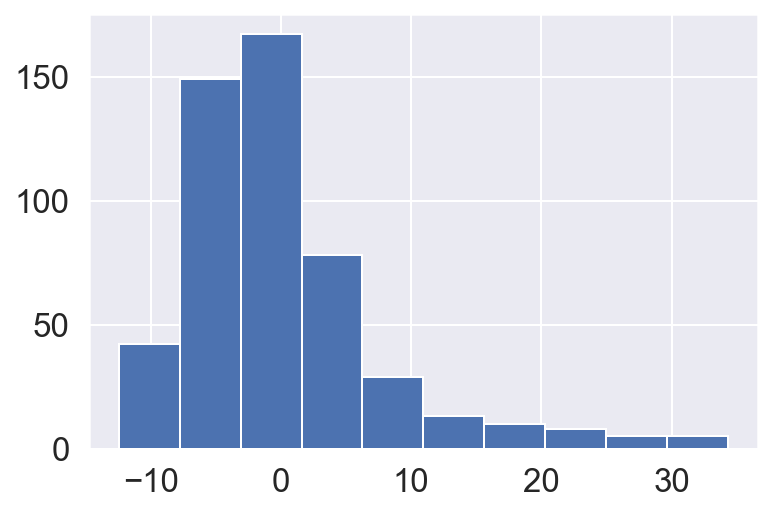

In [40]:
results.resid.hist()
plt.show()

### Skewness and kurtosis of residuals

If the residuals were normally distributed, they should not have any skew and the kurtosis should be 3.

In [41]:
stats.skew(results.resid), stats.kurtosis(results.resid, fisher=False, bias=True)

(1.8704754997113586, 7.568424091226796)

### Jarque-Bera test

This is another normality test. This test should only be used with enough data samples (more than 2000).

In [42]:
stats.jarque_bera(results.resid)

(735.074908626496, 0.0)

### Durbin-Watson test

This tests for serial autocorrelations among the residuals.
Values close to 0 imply positive serial autocorrelation, values close to 2 imply absence of serial autocorrelation, values close to 4 imply negative serial autocorrelation. Serial autocorrelation could be observed if you data recorded over time and knowing on which day it is recorded helps you to estimate how large the residuals are.

In [43]:
sm.stats.durbin_watson(results.resid)

0.6849357296824539

In [44]:
((results.resid - results.resid.shift(1)).dropna()**2).sum() / (results.resid**2).sum()

0.6849357296824539

### Conditioning number

The conditioning number is a measure of multi-collinearity in the predictor matrix. You might see statsmodels giving warnings about large conditioning numbers. It is related to the relative sizes of the largest and smallest eigenvalues of the covariance matrix.

In [45]:
results.condition_number

1690.7688402622623

### Fitting with regularization

We can use regularization in form of an elastic net, allowing to reduce the model to either Lasso or Ridge.

In [46]:
results_reg = model.fit_regularized(alpha=1, L1_wt=0.5, refit=False)

In [1]:
results_reg.params

NameError: name 'results_reg' is not defined

## Logistic Regression

Logistic Regression is only implemented for binary classification.
Note that by default no regularization is included.

### Load the breast cancer data

In [48]:
from sklearn.datasets import load_breast_cancer

In [49]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
X.columns = [col.replace(' ', '_') for col in X.columns]
X['target'] = data.target
y = data.target

In [50]:
X.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')

In [51]:
columns = ['mean_radius', 'mean_texture', 'mean_perimeter']

### With dataframe

In [52]:
model = sm.Logit(y, sm.add_constant(X[columns]))
results = model.fit()
results.summary()

# the LLR p-value is a little like the F-statistic where you remove all coefficients to 0, more drastic than
# the individual tests in the P>|z| column. Though you can expect all P's to be > 0 if LLR p is significant.

Optimization terminated successfully.
         Current function value: 0.192353
         Iterations 9


/Users/crahmede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Sun, 02 Feb 2020   Pseudo R-squ.:                  0.7087
Time:                        16:41:52   Log-Likelihood:                -109.45
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.225e-115
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             18.3255      1.961      9.347      0.000      14.483      22.168
mean_radius        6.0262      0.996      6.048      0.000       4.073       7.979
mean_texture      -0.2428      0.045     -5.342      0.000      -0.332      -0.154
mean_perimeter    -1.0675      0.155     -6.889      0.000      -1.371      -0.764
==================================================================================
"""

### With formula

This won't like spaces in the column names.

In [53]:
formula = 'target ~ ' + ('+').join(columns)

In [54]:
formula

'target ~ mean_radius+mean_texture+mean_perimeter'

In [55]:
model = smf.logit(formula, data=X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.192353
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Sun, 02 Feb 2020   Pseudo R-squ.:                  0.7087
Time:                        16:41:52   Log-Likelihood:                -109.45
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.225e-115
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.3255      1.961      9.347      0.000      14.483      22.168
mean_radius        6.0262      0.996      6.048      0.000       4.073       7.979
mean_texture      -0.2428      0.045     -5.342      0.000      -0.332      -0.154
mean_perimeter    -1.0675      0.155     -6.889      0.000      -1.371      -0.764
==================================================================================
"""

### Predicted probabilities for class 1

With the predict method we obtain the predicted probabilities for being part of class 1, not the labels.

In [56]:
# predicted probabilities
results.predict()[:10]

array([0.00103359, 0.01980182, 0.00095381, 0.34966246, 0.00082017,
       0.80150452, 0.01446631, 0.40088603, 0.11522583, 0.11272487])

In [57]:
# predicted labels ... need to do this manually in statsmodels, whereas sklearn you could've got it automated.
# note - statsmodels only calls them 0,1 and only binary classification not multi_class
threshold = 0.5
y_hat = (results.predict() > threshold) * 1

In [58]:
# accuracy at threshold
(y == y_hat).mean()

0.9191564147627417

In [59]:
# confusion matrix at threshold
results.pred_table(threshold=threshold)

array([[184.,  28.],
       [ 18., 339.]])

### Maximum Log-Likelihood

The maximum log-likelihood is obtained by forming the sum of the predicted log-probabilities depending on which class the observations are in.

This is what the regression is trying to optimise by making as large as possible (ie, less negative)

In [60]:
# remember pred is the prob(class 1), so if it was indeed y_true = 1 and model was correctly giving a high 
# prob(class 1) then np.log(pred) would be close to 0, good.

# so there's two ways it could go wrong, ie. large, -ve Max Log-Likelihood:
# 1. you predicted correctly, but actually the pred.prob was close to threshold, therefore overlapped classes
# although in practise this effect will be swamped by:...
# 2. you predict incorrectly, with great certainty, in that case we take np.log(1-pred) which will be v. -ve

sum([np.log(pred) 
     if y_true==1 else np.log(1-pred) 
     for y_true, pred in zip(y, results.predict())])

-109.44873049463472

In [61]:
results.llf

-109.44873049463473

If we just predict the majority class, we obtain the likelihood for the null model.

In [62]:
sum([np.log(y.mean()) 
     if y_true==1 else np.log(1-y.mean()) 
     for y_true in y])

-375.72000269208684

In [63]:
results.llnull

-375.7200027320281

The likelihood ratio test assesses if the proposed model is better than the baseline model. A low p-value indicates that it is.

In [64]:
results.llr_pvalue

4.224606088286518e-115

### Pseudo R-squared

The pseudo r-squared measures how much the model is outperforming the baseline in a similar way to the R2 in regression. It is hardly used for model tuning.

[Pseudo r-squared at statsgeek](https://thestatsgeek.com/2014/02/08/r-squared-in-logistic-regression/)

In [65]:
results.prsquared

0.7086960244363247

In [66]:
1 - results.llf / results.llnull

0.7086960244363247

### Confidence Intervals

Also these are derived from the standard error estimates and the desired confidence level can be set.

In [67]:
results.conf_int(alpha=0.05)

,0,1
Intercept,14.482743,22.168304
mean_radius,4.073359,7.979103
mean_texture,-0.331841,-0.153690
mean_perimeter,-1.371249,-0.763787


### P-values

The p-values are from testing if the model is performing better with or without the predictor while keeping all the others. A low p-value suggests that the predictor should be part of the model.

In [68]:
results.tvalues

Intercept         9.346713
mean_radius       6.048115
mean_texture     -5.341667
mean_perimeter   -6.888650
dtype: float64

In [69]:
results.pvalues

Intercept         9.041382e-21
mean_radius       1.465505e-09
mean_texture      9.209554e-08
mean_perimeter    5.632436e-12
dtype: float64

## Conclusions

Statsmodels gives much more information about model performance than sklearn. The emphasis is on inference rather than on prediction. For default models you can obtain confidence intervals for model coefficients. Regularization is possible, but then often no confidence intervals can be calculated. There is no direct cross validation implementation.

## Additional Resources
 

- [Statsmodels documentation](http://www.statsmodels.org/stable/index.html)
- http://efavdb.com/interpret-linear-regression/